In [1]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Imports

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


from keras import models
from keras import layers
from keras import callbacks

In [3]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!ls -l

total 12
drwx------ 5 root root 4096 Apr  3 09:36 drive
-rw-r--r-- 1 root root   63 Apr  3 09:37 kaggle.json
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data


In [5]:
!mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [7]:
!ls -l

total 12
drwx------ 5 root root 4096 Apr  3 09:36 drive
-rw-r--r-- 1 root root   63 Apr  3 09:37 kaggle.json
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data


In [8]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:00<00:00, 78.5MB/s]



In [9]:
!ls -l

total 67548
-rw-r--r-- 1 root root 69155672 Apr  3 09:37 creditcardfraud.zip
drwx------ 5 root root     4096 Apr  3 09:36 drive
-rw-r--r-- 1 root root       63 Apr  3 09:37 kaggle.json
drwxr-xr-x 1 root root     4096 Mar 25 13:38 sample_data


In [10]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [11]:
!ls -l

total 214844
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Apr  3 09:37 creditcardfraud.zip
drwx------ 5 root root      4096 Apr  3 09:36 drive
-rw-r--r-- 1 root root        63 Apr  3 09:37 kaggle.json
drwxr-xr-x 1 root root      4096 Mar 25 13:38 sample_data


In [12]:
# Import the dataset into pandas dataframe
df_alldata = pd.read_csv('creditcard.csv')

In [13]:
df_alldata.shape

(284807, 31)

In [14]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df_alldata.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
transactions = len(df_alldata)
nonfraud_count = len(df_alldata[df_alldata.Class == 0])
fraud_count = len(df_alldata[df_alldata.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('Total Transations         = ', transactions)
print('Number of Non-fraud cases = ', nonfraud_count)
print('Number of Non-fraud cases = ', fraud_count)
print('Percentage of fraud cases = ', fraud_percentage)


Total Transations         =  284807
Number of Non-fraud cases =  284315
Number of Non-fraud cases =  492
Percentage of fraud cases =  0.17


In [17]:
df_alldata = df_alldata.drop(['Time'], axis =1)

In [18]:
df_alldata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
train_dataset = df_alldata.sample(frac = 0.7, random_state = 100)

In [20]:
train_dataset.shape

(199365, 30)

In [21]:
test_dataset = df_alldata.drop(train_dataset.index)

In [22]:
test_dataset.shape

(85442, 30)

In [23]:
train_labels = train_dataset.pop('Class')

In [24]:
test_labels = test_dataset.pop('Class')

In [25]:
train_labels.head()

49089     0
154704    0
67247     0
251657    0
201903    0
Name: Class, dtype: int64

In [26]:
test_labels.head()

2     0
9     0
10    0
17    0
20    0
Name: Class, dtype: int64

In [27]:
train_stats = train_dataset.describe()

In [28]:
train_stats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000
mean,-0.000612,0.005182,-0.004105,0.001761,-0.003080,0.000128,-0.000734,0.000744,0.001512,0.000079,0.000835,0.001778,-0.001404,-0.000676,0.001659,0.000560,0.000059,-0.000485,-0.000507,-0.000440,0.000625,-0.000262,0.000495,0.001927,0.001231,-0.000161,-0.000455,0.001095,88.109363
std,1.969047,1.656528,1.527194,1.417690,1.395411,1.338274,1.256848,1.194400,1.100427,1.096889,1.022735,1.000956,0.995274,0.963840,0.915402,0.876490,0.854032,0.838201,0.812484,0.777407,0.736217,0.725836,0.611351,0.604822,0.521028,0.481710,0.408775,0.338162,255.311938
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-50.943369,-13.434066,-24.588262,-4.682931,-18.683715,-4.008640,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-22.889347,-10.933144,-36.666000,-2.822684,-8.696627,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.920482,-0.596260,-0.891950,-0.845133,-0.691347,-0.769207,-0.554720,-0.207990,-0.641669,-0.535141,-0.762468,-0.402016,-0.650097,-0.424654,-0.581513,-0.466037,-0.483191,-0.498862,-0.456560,-0.211596,-0.227936,-0.542563,-0.161282,-0.353075,-0.316246,-0.326719,-0.070669,-0.052670,5.580000
50%,0.022628,0.067181,0.179384,-0.015583,-0.056884,-0.276135,0.038461,0.022779,-0.048282,-0.093068,-0.032456,0.141469,-0.016775,0.050601,0.049612,0.067435,-0.066225,-0.004300,0.003983,-0.062430,-0.029256,0.006762,-0.011042,0.041946,0.018433,-0.051835,0.001547,0.011423,21.980000
75%,1.315333,0.805571,1.027036,0.742906,0.610206,0.394520,0.568213,0.328375,0.598032,0.453374,0.741313,0.618749,0.660510,0.492764,0.650876,0.521538,0.399673,0.500733,0.457185,0.132150,0.186710,0.528478,0.147484,0.441882,0.352061,0.240587,0.091382,0.078045,76.860000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,4.846452,7.126883,7.754599,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,8.361985,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [29]:
train_stats = train_stats.transpose()

In [30]:
train_stats

,count,mean,std,min,25%,50%,75%,max
V1,199365.0,-0.000612,1.969047,-56.407510,-0.920482,0.022628,1.315333,2.454930
V2,199365.0,0.005182,1.656528,-72.715728,-0.596260,0.067181,0.805571,22.057729
V3,199365.0,-0.004105,1.527194,-48.325589,-0.891950,0.179384,1.027036,9.382558
V4,199365.0,0.001761,1.417690,-5.683171,-0.845133,-0.015583,0.742906,16.875344
V5,199365.0,-0.003080,1.395411,-113.743307,-0.691347,-0.056884,0.610206,34.801666
V6,199365.0,0.000128,1.338274,-26.160506,-0.769207,-0.276135,0.394520,73.301626
V7,199365.0,-0.000734,1.256848,-43.557242,-0.554720,0.038461,0.568213,120.589494
V8,199365.0,0.000744,1.194400,-50.943369,-0.207990,0.022779,0.328375,20.007208
V9,199365.0,0.001512,1.100427,-13.434066,-0.641669,-0.048282,0.598032,15.594995
V10,199365.0,0.000079,1.096889,-24.588262,-0.535141,-0.093068,0.453374,23.745136


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [32]:
normed_train_dataset = norm(train_dataset)

In [33]:
normed_train_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,0.624700,-0.145280,-0.407977,0.294927,1.290011,3.040817,-0.712488,0.866845,0.676536,-0.134364,-0.832370,0.395689,-0.259672,-0.286758,-0.839487,-0.229901,-0.395981,0.007775,0.588243,-0.073941,-0.231840,-0.397456,-0.213895,1.693072,1.625169,-0.563231,0.148019,0.050299,-0.337310
154704,1.024610,-0.056705,-1.954665,-0.101811,1.919512,2.489895,-0.518442,0.629661,1.782085,-0.934555,1.101108,-2.417559,1.257689,-0.057617,-0.806590,0.016226,2.213254,0.398758,-0.553723,-0.189320,-0.250982,-0.123167,0.141806,0.940361,0.193210,1.289164,-0.118655,-0.129898,-0.317726
67247,0.272063,-0.890035,0.571234,0.270652,-1.029127,0.274974,-0.396736,0.253645,0.945598,-0.398662,1.119440,0.904930,-1.099425,-0.056445,-0.681164,-0.218629,0.365243,-0.570449,0.285132,0.563571,0.037197,-0.529660,-0.210797,0.470734,-0.264728,1.897542,-0.202825,0.151968,0.854056
251657,1.081283,-0.073888,-0.988613,0.116171,0.259530,-0.403654,0.092896,-0.181584,0.616853,0.072841,-1.668236,-0.129233,-0.207522,0.320129,0.231409,0.185366,-0.687430,-0.669061,0.582379,-0.291788,-0.487109,-1.246594,0.364731,-1.781570,-0.364182,0.556006,-0.174371,-0.216859,-0.341227
201903,0.283998,0.955448,-1.548370,3.613380,1.558586,-0.374024,0.843828,-0.213477,-1.781648,0.865025,-0.282579,-1.008460,0.473960,-2.875192,0.240659,0.403624,3.048047,1.304055,0.822898,0.321449,-0.048455,0.374351,0.623391,0.545737,-0.644855,0.932203,0.413528,0.011412,-0.226544


In [34]:
normed_test_dataset = norm(test_dataset)

In [35]:
normed_test_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2,-0.689543,-0.812148,1.163778,0.266644,-0.358402,1.345294,0.630303,0.206741,-1.377799,0.189230,0.609803,0.064245,0.722109,-0.171471,2.560849,-3.297976,1.299612,-0.144207,-2.783257,0.675861,0.336006,1.063521,1.486736,-1.142829,-0.631199,-0.288420,-0.134299,-0.179935,1.138022
9,-0.171479,0.672739,0.686535,-0.157967,0.360067,-0.184483,0.519010,0.057598,-0.670867,-0.334514,0.994177,0.833814,1.013035,-0.459461,0.162290,0.843013,-0.633511,0.569269,0.556663,0.262605,-0.336230,-0.872773,-0.198396,-0.639820,-0.136199,0.195886,0.603447,0.242429,-0.330691
10,0.736222,-0.713252,0.601080,-0.971600,-1.410555,-0.470218,-1.131802,0.039946,-1.564776,1.482904,1.172160,-0.672574,-0.514976,-0.097910,0.250460,0.035833,0.296659,1.019837,-0.271832,-0.497534,-0.013483,0.432821,0.044565,0.824350,0.480083,-0.268453,0.105938,0.044824,-0.314554
17,-0.221576,0.551626,0.608106,-0.514203,0.658415,-0.095642,0.563613,0.073023,-0.605932,-0.672866,0.316077,0.275151,0.255235,-0.302146,-0.203385,1.303623,-1.087509,0.812400,0.031930,-0.059919,-0.265439,-0.926346,-0.257385,-1.472026,-0.659549,-0.101441,0.196067,0.384219,-0.341619
20,0.353215,-0.825221,0.676618,0.587151,-0.851454,0.978112,-0.698456,0.372192,-0.406850,0.518231,0.995679,1.295312,0.423888,-0.385930,-0.884462,-2.333304,0.603730,0.747234,-1.599911,-0.177377,-0.402337,-0.787633,-0.084037,-0.506169,0.135828,-0.876197,0.212851,0.184537,0.562452


In [36]:
normed_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199365 entries, 49089 to 121882
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      199365 non-null  float64
 1   V2      199365 non-null  float64
 2   V3      199365 non-null  float64
 3   V4      199365 non-null  float64
 4   V5      199365 non-null  float64
 5   V6      199365 non-null  float64
 6   V7      199365 non-null  float64
 7   V8      199365 non-null  float64
 8   V9      199365 non-null  float64
 9   V10     199365 non-null  float64
 10  V11     199365 non-null  float64
 11  V12     199365 non-null  float64
 12  V13     199365 non-null  float64
 13  V14     199365 non-null  float64
 14  V15     199365 non-null  float64
 15  V16     199365 non-null  float64
 16  V17     199365 non-null  float64
 17  V18     199365 non-null  float64
 18  V19     199365 non-null  float64
 19  V20     199365 non-null  float64
 20  V21     199365 non-null  float64
 21  V22   

In [37]:
normed_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85442 entries, 2 to 284805
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      85442 non-null  float64
 1   V2      85442 non-null  float64
 2   V3      85442 non-null  float64
 3   V4      85442 non-null  float64
 4   V5      85442 non-null  float64
 5   V6      85442 non-null  float64
 6   V7      85442 non-null  float64
 7   V8      85442 non-null  float64
 8   V9      85442 non-null  float64
 9   V10     85442 non-null  float64
 10  V11     85442 non-null  float64
 11  V12     85442 non-null  float64
 12  V13     85442 non-null  float64
 13  V14     85442 non-null  float64
 14  V15     85442 non-null  float64
 15  V16     85442 non-null  float64
 16  V17     85442 non-null  float64
 17  V18     85442 non-null  float64
 18  V19     85442 non-null  float64
 19  V20     85442 non-null  float64
 20  V21     85442 non-null  float64
 21  V22     85442 non-null  float64
 2

In [38]:
normed_train_dataset.shape

(199365, 29)

In [39]:
normed_test_dataset.shape

(85442, 29)

In [40]:
train_labels.shape

(199365,)

In [41]:
test_labels.shape

(85442,)

In [46]:
# As per Assignment requirment
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(29,)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

In [47]:
model = build_model()

In [48]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [50]:
# epochs
history = model.fit(normed_train_dataset, train_labels, epochs=100, batch_size=50000, validation_split=0.2, verbose=0)

In [51]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.003659,0.999279,0.003370,0.999423,95
96,0.003629,0.999279,0.003390,0.999323,96
97,0.003607,0.999266,0.003368,0.999348,97
98,0.003592,0.999254,0.003312,0.999448,98
99,0.003564,0.999291,0.003293,0.999448,99


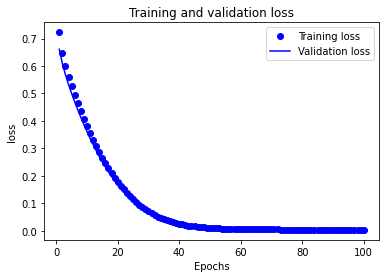

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

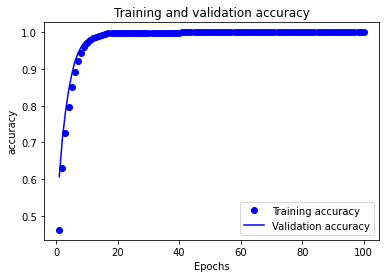

In [53]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [54]:
evaluate = model.evaluate(normed_test_dataset, test_labels, verbose=0)

In [55]:
evaluate

[0.002691733418032527, 0.9994850158691406]

In [61]:
# Loss 0.002
# Accuracy 99.94%

In [56]:
test_predictions = model.predict(normed_test_dataset)

In [57]:
test_predictions[:10]

array([[7.1249611e-05],
       [2.5098610e-05],
       [6.2391700e-05],
       [1.7872419e-05],
       [9.4125047e-05],
       [1.2277663e-03],
       [1.4957786e-04],
       [8.0269575e-04],
       [2.2194992e-05],
       [2.0826697e-05]], dtype=float32)

In [58]:
test_labels[:10]

2     0
9     0
10    0
17    0
20    0
27    0
32    0
36    0
44    0
48    0
Name: Class, dtype: int64

In [ ]:
np.where(test_labels > 0)

(array([  168,  1840,  1906,  1907,  2025,  2042,  2079,  2108,  2545,
         2630,  2754,  2774,  2930,  3234,  3239,  3240,  3299,  3585,
         3620,  4352,  4669,  4814,  5110,  5620,  5712,  5720,  9264,
         9485, 12687, 12848, 12865, 12872, 12887, 12901, 12928, 13020,
        13087, 13392, 14367, 14448, 15044, 15719, 15736, 17249, 19268,
        19284, 20826, 20950, 22066, 22084, 22919, 24448, 24952, 25326,
        26588, 26594, 27964, 28819, 30608, 30609, 30610, 32473, 34164,
        34698, 35773, 35794, 37069, 37089, 42297, 42298, 42644, 42870,
        43626, 44157, 44178, 44793, 44877, 45095, 45100, 45102, 45107,
        45111, 45205, 45346, 46063, 46263, 46314, 46327, 46332, 46342,
        47017, 47196, 47289, 47291, 48852, 52724, 53081, 53405, 54580,
        54901, 57001, 59388, 64592, 64833, 65566, 65743, 66252, 66333,
        66660, 67097, 67100, 68045, 68893, 69123, 70358, 70671, 71798,
        72025, 72391, 72970, 73013, 73561, 74661, 74718, 75529, 75536,
      

In [ ]:
test_labels[168:170]

541    1
543    0
Name: Class, dtype: int64

In [59]:
test_predictions[168:170]

array([[6.8900716e-01],
       [2.9759438e-05]], dtype=float32)

In [60]:
# Verification is successful